<a href="https://colab.research.google.com/github/aryanyashishere/dogs_vs_cats_classification_using_cnn/blob/main/dogs_vs_cats_classification_cnn_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

 99% 1.05G/1.06G [00:06<00:00, 40.8MB/s]
100% 1.06G/1.06G [00:08<00:00, 137MB/s] 


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from tensorflow.keras import models, layers
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

## We will you generators to divide the images into batches

In [ ]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
len(train_ds)
len(validation_ds)


157

In [ ]:
# train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
# validation_ds = validation_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)


Creating a Layer for Resizing and Normalization Before we feed our images to network, we should be resizing it to the desired size. Moreover, to improve model performance, we should normalize the image pixel value (keeping them in range 0 and 1 by dividing by 256). This should happen while training as well as inference. Hence we can add that as a layer in our Sequential Model.

You might be thinking why do we need to resize (256,256) image to again (256,256). You are right we don't need to but this will be useful when we are done with the training and start using the model for predictions. At that time somone can supply an image that is not (256,256) and this layer will resize it

resize_and_rescale = tf.keras.Sequential([ layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE), layers.experimental.preprocessing.Rescaling(1./255), ])

In [ ]:
resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(256, 256),
  layers.experimental.preprocessing.Rescaling(1./255),
])

## Data Augmentation
## Data Augmentation is needed when we have less data, this boosts the accuracy of our model by augmenting the data.



In [ ]:
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

Applying Data Augmentation to Train Dataset

In [ ]:
train_ds = train_ds.map(
    lambda x, y: (data_augmentation(x, training=True), y)
).prefetch(buffer_size=tf.data.AUTOTUNE)

# Normalising the images with (0, 255)size and labels

In [ ]:
# def process(image,label):
#     image = tf.cast(image/255. ,tf.float32)
#     return image,label

# train_ds = train_ds.map(process)
# validation_ds = validation_ds.map(process)

# Creating a CNN model with 3 Convolutional Layers i) first layer will be 32 filters, second layer will be 64 filter and third layer will 128 filters

In [ ]:
model = models.Sequential([
    resize_and_rescale,
layers.Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)),
# layers.BatchNormalization(),
layers.MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'),

layers.Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'),
layers.BatchNormalization(),
layers.MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'),


layers.Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'),
layers.BatchNormalization(),
layers.MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'),

layers.Flatten(),

layers.Dense(128,activation='relu'),
layers.Dropout(0.1),
layers.Dense(64,activation='relu'),
layers.Dropout(0.1),
layers.Dense(1,activation='sigmoid'),
])
model.build((32, 256, 256, 3))


In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (32, 127, 127, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (32, 62, 62, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (32, 60, 60, 128)        

In [ ]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
    )

In [15]:
history = model.fit(train_ds,
                    validation_data=validation_ds,
                    epochs=15,)

Epoch 1/15
625/625 [==============================] - 219s 336ms/step - loss: 0.6707 - accuracy: 0.5830 - val_loss: 0.6771 - val_accuracy: 0.5818
Epoch 2/15
625/625 [==============================] - 209s 334ms/step - loss: 0.6193 - accuracy: 0.6597 - val_loss: 0.6038 - val_accuracy: 0.6782
Epoch 3/15
625/625 [==============================] - 212s 339ms/step - loss: 0.5806 - accuracy: 0.6957 - val_loss: 0.5526 - val_accuracy: 0.7092
Epoch 4/15
625/625 [==============================] - 207s 331ms/step - loss: 0.5515 - accuracy: 0.7160 - val_loss: 0.5459 - val_accuracy: 0.7220
Epoch 5/15
625/625 [==============================] - 210s 335ms/step - loss: 0.5327 - accuracy: 0.7347 - val_loss: 0.5371 - val_accuracy: 0.7190
Epoch 6/15
625/625 [==============================] - 210s 335ms/step - loss: 0.5183 - accuracy: 0.7453 - val_loss: 0.5021 - val_accuracy: 0.7556
Epoch 7/15
625/625 [==============================] - 203s 325ms/step - loss: 0.5010 - accuracy: 0.7554 - val_loss: 0.5306 -

In [16]:
# history = model.fit(train_ds,
#                     validation_data=validation_ds,

#                     epochs=10,)


In [17]:
import pickle

# save the iris classification model as a pickle file
dogsvscats_pkl_file = "dogvscatspklfile.pkl"

with open(dogsvscats_pkl_file, 'wb') as file:

    pickle.dump(model, file)



In [18]:
model.save('model1.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


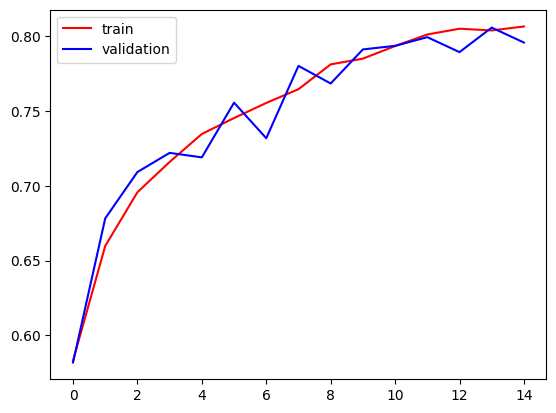

In [19]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

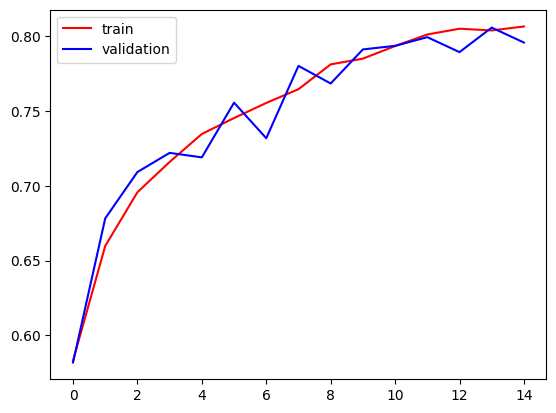

In [20]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

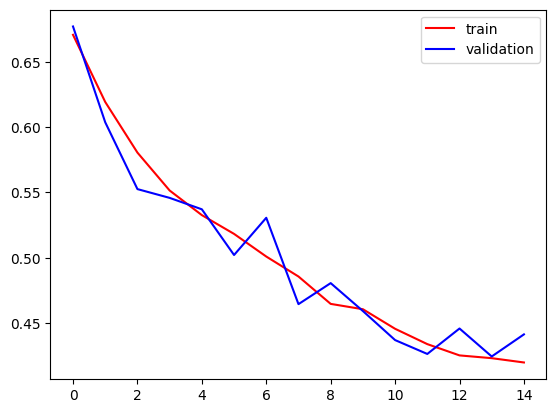

In [21]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

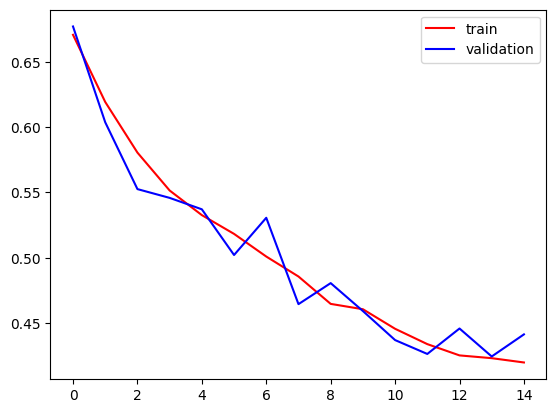

In [22]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [27]:
model_pkl_file = 'dogvscatspklfile.pkl'

In [28]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [48]:
test_img = cv2.imread('/content/cat1.jpg')
test_img = np.array(test_img)

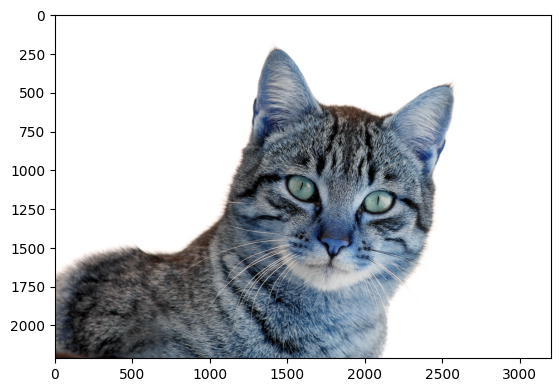

In [49]:
plt.imshow(test_img)

In [50]:
test_img.shape

(2212, 3200, 3)

In [51]:
test_img = cv2.resize(test_img,(256,256))

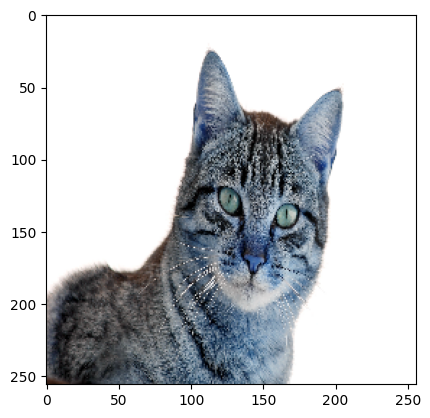

In [52]:
plt.imshow(test_img)

In [58]:
test_input = test_img.reshape((1,256,256,3))
test_input

array([[[[ 31,  57,  41],
         [ 29,  55,  39],
         [ 29,  55,  39],
         ...,
         [ 42,  96,  83],
         [ 40,  94,  81],
         [ 38,  92,  79]],

        [[ 29,  54,  40],
         [ 28,  53,  39],
         [ 27,  52,  38],
         ...,
         [ 44,  97,  84],
         [ 42,  96,  83],
         [ 40,  94,  81]],

        [[ 29,  53,  41],
         [ 28,  52,  40],
         [ 27,  51,  39],
         ...,
         [ 46, 100,  87],
         [ 44,  98,  85],
         [ 42,  96,  84]],

        ...,

        [[139, 161, 189],
         [135, 157, 185],
         [130, 152, 180],
         ...,
         [129, 153, 183],
         [129, 153, 183],
         [130, 154, 184]],

        [[138, 161, 189],
         [134, 156, 184],
         [129, 151, 179],
         ...,
         [130, 154, 184],
         [128, 152, 182],
         [126, 150, 180]],

        [[136, 158, 186],
         [133, 155, 183],
         [129, 151, 179],
         ...,
         [128, 152, 182],
        

In [54]:
predicted_value = model.predict(test_input )
predicted_value

1/1 [==============================] - 0s 28ms/step


array([[0.06846371]], dtype=float32)

In [55]:
test_img = cv2.imread('/content/dog2.jfif')

test_img = cv2.resize(test_img,(256,256))
test_img = np.array(test_img)

In [56]:
test_input = test_img.reshape((1,256,256,3))

In [57]:
model.predict(test_input)

1/1 [==============================] - 0s 19ms/step


array([[0.7526939]], dtype=float32)

In [61]:
def prediction():
  path = input("enter the path to the image here : ")
  test_img = cv2.imread(path)
  test_img = np.array(test_img)
  test_img = cv2.resize(test_img,(256,256))
  test_input = test_img.reshape((1,256,256,3))
  predicted_value = model.predict(test_input )
  return predicted_value





In [65]:
prob_predict = prediction()
if prob_predict[0] > 0.5:
  print("it is a dog")
else:
  print("it is a cat ")


enter the path to the image here : /content/cat1.jpg
1/1 [==============================] - 0s 19ms/step
it is a cat 


In [66]:
prob_predict = prediction()
if prob_predict[0] > 0.5:
  print("it is a dog")
else:
  print("it is a cat ")

enter the path to the image here : /content/dog1.jpg
1/1 [==============================] - 0s 19ms/step
it is a dog


In [68]:
prob_predict = prediction()
if prob_predict[0] > 0.5:
  print("it is a dog")
else:
  print("it is a cat ")

enter the path to the image here : /content/dog2.jfif
1/1 [==============================] - 0s 18ms/step
it is a dog


In [69]:
prob_predict = prediction()
if prob_predict[0] > 0.5:
  print("it is a dog")
else:
  print("it is a cat ")

enter the path to the image here : /content/cat2.jpg
1/1 [==============================] - 0s 34ms/step
it is a cat 
